In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import HTC

In [52]:
# Load connectome and normalize it

W=np.loadtxt("../Data/connectivity_matrix/group_mean_connectivity_matrix_file.txt")
W=W/W.sum(axis=1)[:,None]

In [53]:
# Create brain object and set its parameters

brain=HTC.Brain(W)
#brain.set_netowrk_parameters(2/998,(2/998)**(1/5),(2/998)**(1/5)/(1+2*(2/998)**(1/5))/1.2)
brain.set_netowrk_parameters(r1=2e-3, r2=0.288, tc=0.15, tmin=0.05, tmax=0.25, delta_tc=0.005)
brain.set_simulation_parameters(dt=0.1, n_timesteps=600, runs=100)

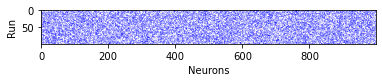

In [54]:
# Generate initial configuration with 50% active neurons

states = HTC.generate_initial_conf(0.1) # with random configurations
activity=np.zeros((brain.n_timesteps, brain.n_runs, brain.n_neurons)) #storing time, run and activity

plt.xlabel("Neurons")
plt.ylabel("Run")
_=plt.imshow(states, cmap='bwr')

In [8]:
#%%time
# Evolve over time the states (save every step in activity matrix)

#for t in range(brain.n_timesteps):
#    states, activity[t] = HTC.update_states(brain.r1, brain.r2, brain.tc, W, states)

CPU times: user 18.4 s, sys: 3.05 s, total: 21.4 s
Wall time: 6.35 s


In [55]:
%%time
tc,a=brain.simulation(active_frac=0.3, n_runs=100)

End of  0.05
End of  0.055
End of  0.06
End of  0.065
End of  0.06999999999999999
End of  0.07499999999999998
End of  0.07999999999999999
End of  0.08499999999999999
End of  0.08999999999999998
End of  0.09499999999999997
End of  0.09999999999999998
End of  0.10499999999999998
End of  0.10999999999999997
End of  0.11499999999999998
End of  0.11999999999999997
End of  0.12499999999999996
End of  0.12999999999999995
End of  0.13499999999999995
End of  0.13999999999999996
End of  0.14499999999999996
End of  0.14999999999999997
End of  0.15499999999999997
End of  0.15999999999999995
End of  0.16499999999999992
End of  0.16999999999999993
End of  0.17499999999999993
End of  0.17999999999999994
End of  0.18499999999999994
End of  0.18999999999999995
End of  0.19499999999999995
End of  0.1999999999999999
End of  0.2049999999999999
End of  0.2099999999999999
End of  0.2149999999999999
End of  0.21999999999999992
End of  0.22499999999999992
End of  0.22999999999999993
End of  0.2349999999999999

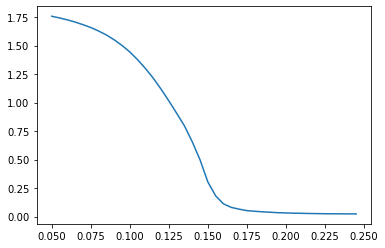

In [49]:
plt.plot(tc,a)

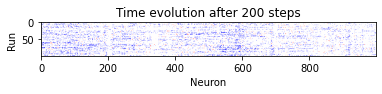

In [10]:
# Display state patterns after 200 steps

plt.xlabel("Neuron")
plt.ylabel("Run")
plt.title("Time evolution after "+str(brain.n_timesteps)+" steps")
_=plt.imshow(states[:,], cmap='bwr')

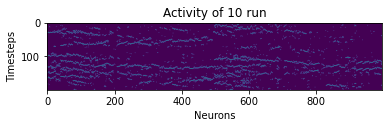

In [11]:
# Display activity over time
run=10
plt.title("Activity of "+str(run)+" run")
plt.ylabel("Timesteps")
plt.xlabel("Neurons")
_=plt.imshow(activity[:,run])